# PART A

# Major Imports

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
from time import time
from keras.callbacks import TensorBoard
import tensorflow as tf

Using TensorFlow backend.


# Some Pre-Processing Steps

### Batch SIze = 200
### Epochs = 10

In [2]:
batch_size = 200
num_classes = 10
epochs = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# Network Initialization

### 3 Convolution Layers of size 3x3, 5x5 and 3x3 having rectified linear Activation function followed by Max Pool Layer of size 2x2  after 2nd and 3rd Convolution Layer followed by dense layer with dropout of 0.25.

In [3]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


# Fit Model and compute accuracy score 

In [4]:
#cb=keras.callbacks.TensorBoard(log_dir='/tmp/mnist_demo/2', histogram_freq=0, batch_size=200, write_graph=True, write_grads=True, write_images=True,embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None, embeddings_data=None, update_freq='epoch')
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1, shuffle = True,
          validation_data=(x_test, y_test), callbacks=[keras.callbacks.TensorBoard(log_dir="/tmp/mnist/2".format(time()), histogram_freq=1, write_graph=True, write_images=True)])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 90s 2ms/step - loss: 0.2593 - acc: 0.9186 - val_loss: 0.0502 - val_acc: 0.9835
Epoch 2/10
60000/60000 [==============================] - 93s 2ms/step - loss: 0.0637 - acc: 0.9803 - val_loss: 0.0331 - val_acc: 0.9887
Epoch 3/10
60000/60000 [==============================] - 96s 2ms/step - loss: 0.0430 - acc: 0.9869 - val_loss: 0.0251 - val_acc: 0.9915
Epoch 4/10
60000/60000 [==============================] - 96s 2ms/step - loss: 0.0333 - acc: 0.9900 - val_loss: 0.0245 - val_acc: 0.9919
Epoch 5/10
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0266 - acc: 0.9916 - val_loss: 0.0226 - val_acc: 0.9916
Epoch 6/10
60000/60000 [==============================] - 89s 1ms/step - loss: 0.0213 - acc: 0.9935 - val_loss: 0.0230 - val_acc: 0.9923
Epoch 7/10
60000/60000 [==============================] - 96s 2ms/step - loss: 0.0181 - acc: 0.9946 - val_loss: 0.0231 - val_acc

# PART B

# Error vs Epoch

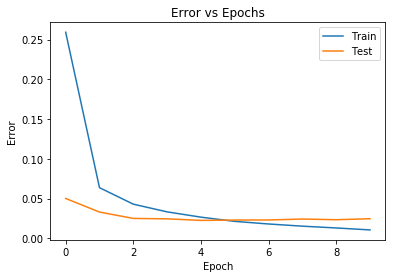

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Error vs Epochs')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()